# Case Study on Correlation and Regression

A textile company regularly spent money on five advertising companies for their 
  ads. (Dataset added along with)
1. First of all, check whether there is any relationship between the amount 
   spent for advertising through five different companies and profit 
   generated.
2. Build a regression model to predict the profit from the given data and 
   comment your findings on it.
3. Predict the profit generated by the company, if they wish to spend the 
   following amount for advertisement.
   
#Add1(in Thousands) 290
#Add2(in Thousands) 312
#Add3(in Thousands) 309
#Add4(in Thousands) 298
#Add5(in Thousands) 320

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('Add_sales_data_2018.csv')
df.head()

,Date,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4093.065
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,4042.448
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,4213.819
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,4391.665
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,4350.683


In [3]:
df=df.set_index('Date')
df.tail()

,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
Date,,,,,,
2017-12-14,288.00,288.25,279.20,284.50,284.30,5374.105
2017-12-13,290.00,292.50,282.20,284.80,284.45,5439.655
2017-12-12,298.60,298.60,286.65,287.45,287.80,5545.013
2017-12-11,290.00,299.55,285.90,297.85,298.35,5565.444
2017-12-08,287.55,289.90,285.05,288.05,288.45,5421.842


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 205 entries, 2018-10-08 to 2017-12-08
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Add1(in Thousands)    205 non-null    float64
 1   Add2(in Thousands)    205 non-null    float64
 2   Add3(in Thousands)    205 non-null    float64
 3   Add4(in Thousands)    205 non-null    float64
 4   Add5(in Thousands)    205 non-null    float64
 5   Profit(in Thousands)  205 non-null    float64
dtypes: float64(6)
memory usage: 11.2+ KB


In [5]:
df.describe()

,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,267.577561,271.722439,262.990732,267.223902,267.152683,5059.630234
std,26.219588,25.914939,26.126704,26.238832,26.215360,486.910414
min,208.000000,218.600000,205.900000,210.250000,209.200000,4042.448000
25%,244.000000,248.500000,240.300000,243.050000,243.000000,4617.695000
50%,269.700000,274.200000,263.250000,268.900000,268.350000,5088.455000
75%,284.400000,288.800000,280.900000,284.500000,284.450000,5387.438000
max,327.700000,328.750000,321.650000,325.950000,325.750000,6137.800000


In [6]:
df.shape

(205, 6)

In [7]:
df.isna().sum()

Add1(in Thousands)      0
Add2(in Thousands)      0
Add3(in Thousands)      0
Add4(in Thousands)      0
Add5(in Thousands)      0
Profit(in Thousands)    0
dtype: int64

<Figure size 1440x720 with 0 Axes>

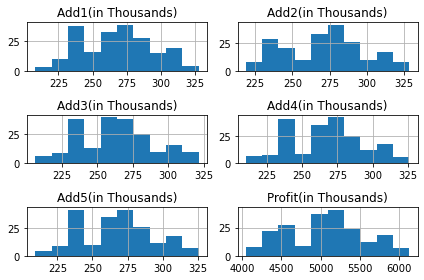

In [8]:
plt.figure(figsize=(20,10))
df.hist()
plt.tight_layout()
plt.show()

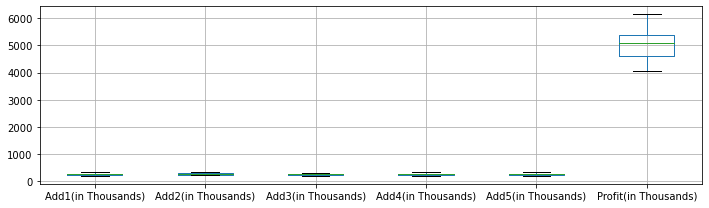

In [9]:
plt.figure(figsize=(10,3))
df.boxplot()
plt.tight_layout()
plt.show()

### check whether there is any relationship between the amount spent for advertising through five different companies and profit generated.

<Figure size 720x720 with 0 Axes>

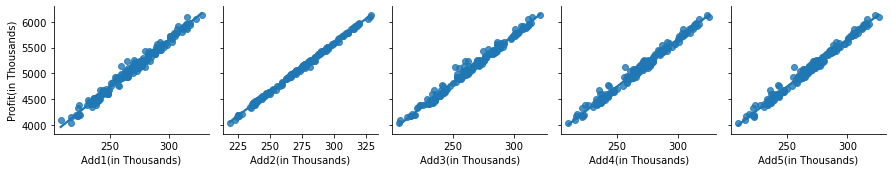

In [10]:
plt.figure(figsize=(10,10))
sns.pairplot(df,x_vars=['Add1(in Thousands)','Add2(in Thousands)','Add3(in Thousands)','Add4(in Thousands)','Add5(in Thousands)'],
             y_vars='Profit(in Thousands)',kind='reg')
plt.tight_layout()
plt.show()

<AxesSubplot:>

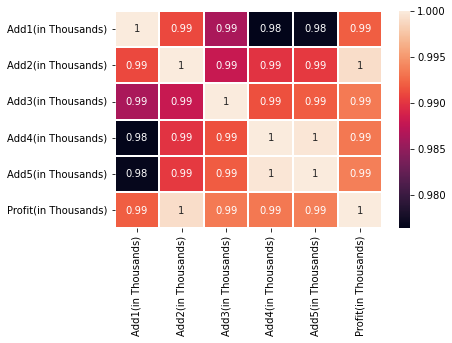

In [11]:
data=df.corr()
sns.heatmap(data,annot=True,linewidth=.2)

From the graph it can be seen that there is linear relation between  the amount spent for advertising through five different companies and profit generated and also there is strong positive correlation

### Build a regression model to predict the profit from the given data and comment your findings on it.

In [12]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

In [13]:
y=df['Profit(in Thousands)']
x=df.drop(['Profit(in Thousands)'],axis=1)

In [14]:
#train and test
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)
lr=linear_model.LinearRegression()
model=lr.fit(x_train,y_train)
predictions=model.predict(x_test)
print(y_test)
print(predictions)

Date
2018-09-12    4152.066
2018-09-24    4446.441
2018-05-14    5131.898
2018-03-26    4907.560
2018-06-27    5004.282
2018-05-21    4623.793
2018-02-14    5384.175
2018-02-08    5328.025
2018-03-05    5175.051
2018-01-10    5956.323
2017-12-28    5780.799
2018-02-06    4997.719
2018-07-02    5075.858
2018-01-19    5784.540
2018-06-20    4936.120
2018-02-23    5065.652
2018-09-07    4190.965
2018-06-07    5034.726
2018-06-01    5015.536
2018-03-09    5134.657
2018-07-09    5145.131
2018-05-11    5421.940
2018-05-16    4569.293
2018-08-21    4598.292
2018-08-29    4436.321
2018-09-11    4175.677
2018-01-31    5616.791
2017-12-21    5667.250
2018-05-17    4648.834
2017-12-22    5717.838
2018-06-28    5001.615
2018-04-13    5182.368
2018-02-21    5017.503
2017-12-12    5545.013
2018-06-12    5013.207
2018-06-26    5030.451
2018-03-07    5108.626
2018-07-16    4760.877
2018-07-30    4606.340
2018-06-05    4925.861
2018-03-06    5250.788
Name: Profit(in Thousands), dtype: float64
[4152.066

In [15]:
#calulate accuracy
print('MSE is: ',mean_squared_error(y_test,predictions))

MSE is:  3.429773271561334e-25


In [16]:
from sklearn.metrics import r2_score
print('R squared value is ',r2_score(y_test,predictions))

R squared value is  1.0


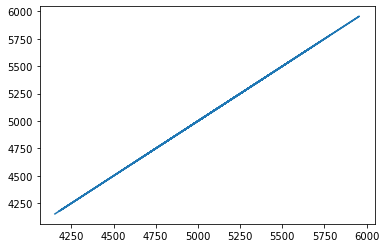

In [17]:
plt.plot(predictions,y_test)

Mean Squared Error is very low(approximately equals to zero) and R squared value is one so that implies model is perfect and  regression predictions perfectly fit the data.

### Predict the profit generated by the company, if they wish to spend the following amount for advertisement. 
### Add1(in Thousands) 290 
### Add2(in Thousands) 312 
### Add3(in Thousands) 309 
### Add4(in Thousands) 298 
### Add5(in Thousands) 320

In [18]:
#converting the given amount to dataframe
Amount={'Add1(in Thousands)':[290],'Add2(in Thousands)': [312],'Add3(in Thousands)':[309],'Add4(in Thousands)':[298],'Add5(in Thousands)':[320]}
s=pd.DataFrame(Amount)
s

,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands)
0,290,312,309,298,320


In [19]:
model.predict(s)

array([5820.06])

Profit generated by the company for the given amount is 5802.06